In [2]:
import pandas as pd

kernels = pd.read_csv('../data/meta-kaggle/Kernels.csv')
print(kernels.head())


   Id  AuthorUserId  CurrentKernelVersionId  ForkParentKernelVersionId  \
0   1          2505                   205.0                        NaN   
1   2          3716                  1748.0                        NaN   
2   4          3716                    41.0                        NaN   
3   5         28963                    19.0                        NaN   
4   6          3716                    21.0                        NaN   

   ForumTopicId  FirstKernelVersionId         CreationDate EvaluationDate  \
0           NaN                   1.0  03/25/2015 18:25:32     03/23/2018   
1       26670.0                   2.0  03/25/2015 18:31:07     04/16/2015   
2           NaN                   9.0  03/25/2015 21:57:36     03/23/2018   
3           NaN                  13.0  03/25/2015 22:01:04     03/23/2018   
4           NaN                  15.0  03/25/2015 22:19:00     03/23/2018   

  MadePublicDate  IsProjectLanguageTemplate     CurrentUrlSlug  Medal  \
0     03/25/2015   

In [3]:
# Group all kernels by user
user_grouped = kernels.groupby('AuthorUserId')

# Total notebooks per user
total_kernels = user_grouped['Id'].count().reset_index(name='TotalNotebooks')

# Total views
total_views = user_grouped['TotalViews'].sum().reset_index(name='TotalViews')

# Total votes
total_votes = user_grouped['TotalVotes'].sum().reset_index(name='TotalVotes')

# Total medals (bronze, silver, gold)
medals = kernels.dropna(subset=['Medal']).groupby(['AuthorUserId', 'Medal'])['Id'].count().unstack(fill_value=0).reset_index()
medals.columns.name = None  # remove column grouping name
medals.columns = ['AuthorUserId', 'GoldMedals', 'SilverMedals', 'BronzeMedals']

# Combine all into one DataFrame
from functools import reduce

dfs = [total_kernels, total_views, total_votes, medals]
user_summary = reduce(lambda left, right: pd.merge(left, right, on='AuthorUserId', how='outer'), dfs)

# Fill NaNs
user_summary.fillna(0, inplace=True)

# Sort by most active users
user_summary = user_summary.sort_values(by='TotalNotebooks', ascending=False)

# Preview
user_summary.head()


,AuthorUserId,TotalNotebooks,TotalViews,TotalVotes,GoldMedals,SilverMedals,BronzeMedals
96758,2080166,56442,10231050,7437,0.0,1.0,8.0
393147,20545127,5275,14525,15,0.0,0.0,0.0
158525,4760409,4407,2026419,16498,0.0,10.0,213.0
110785,2648923,3702,1454130,14002,0.0,12.0,239.0
119814,3012786,2934,1951265,38108,22.0,118.0,831.0


In [4]:
kernels['CreationDate'] = pd.to_datetime(kernels['CreationDate'], errors='coerce')


In [5]:
monthly_activity = kernels.groupby(
    kernels['CreationDate'].dt.to_period('M')
).size().reset_index(name='NotebookCount')

# Convert back to string for plotting
monthly_activity['CreationDate'] = monthly_activity['CreationDate'].astype(str)


/tmp/ipykernel_21672/3430968142.py:10: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/virtustratum/kaggle-persona-analyzer/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


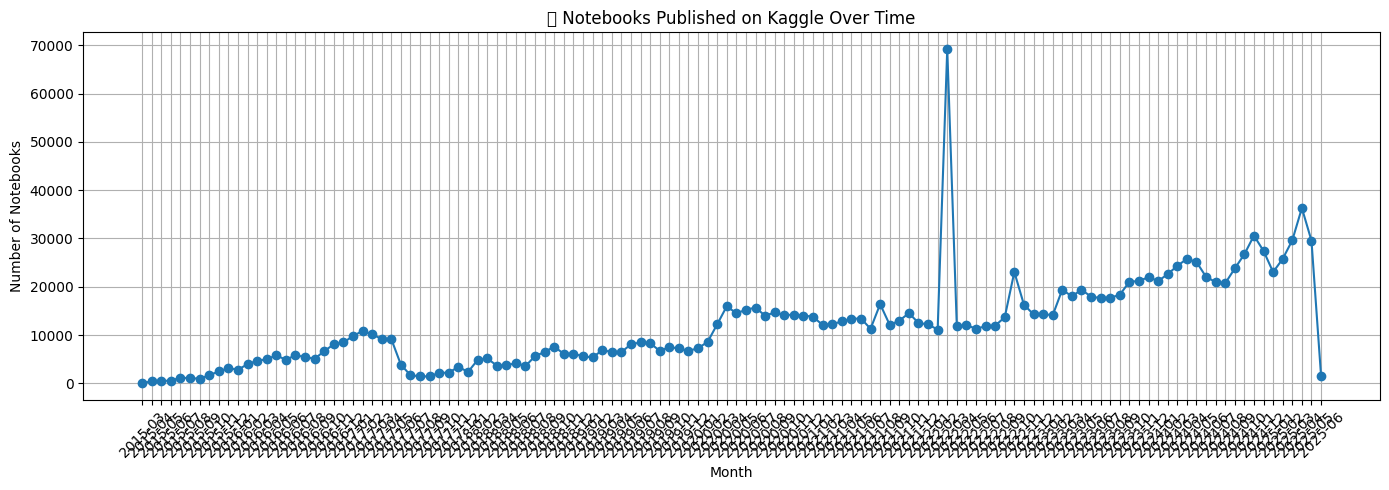

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(monthly_activity['CreationDate'], monthly_activity['NotebookCount'], marker='o')
plt.title('🗓️ Notebooks Published on Kaggle Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Notebooks')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
user_4760409 = kernels[kernels['AuthorUserId'] == 4760409]
user_4760409['CreationMonth'] = user_4760409['CreationDate'].dt.to_period('M')
user_timeline = user_4760409.groupby('CreationMonth').size()
print(user_timeline)


CreationMonth
2020-07     23
2020-08     93
2020-09     20
2020-10     29
2020-11     28
2020-12      7
2021-01     20
2021-02     69
2021-03     18
2021-04     20
2021-05     60
2021-06     21
2021-07     69
2021-08    107
2021-09     61
2021-10     76
2021-11     41
2021-12    514
2022-01    132
2022-02    125
2022-03    154
2022-04    128
2022-05     28
2022-06     56
2022-07    153
2022-08     87
2022-09    173
2022-10    127
2022-11     25
2022-12     31
2023-01     59
2023-02     46
2023-03     29
2023-04     78
2023-05    193
2023-06    104
2023-07     62
2023-08     43
2023-09     31
2023-10     43
2023-11     76
2023-12     12
2024-01     35
2024-02     89
2024-03     45
2024-04     27
2024-05     52
2024-06     41
2024-07    113
2024-08     67
2024-09     98
2024-10     93
2024-11    131
2024-12     28
2025-01     53
2025-02     92
2025-03     72
2025-04     28
2025-05     54
2025-06     18
Freq: M, dtype: int64


/tmp/ipykernel_21672/2074888051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_4760409['CreationMonth'] = user_4760409['CreationDate'].dt.to_period('M')


In [8]:
versions = pd.read_csv('../data/meta-kaggle/KernelVersions.csv')
print(versions.columns)


Index(['Id', 'ScriptId', 'ParentScriptVersionId', 'ScriptLanguageId',
       'AuthorUserId', 'CreationDate', 'VersionNumber', 'Title',
       'EvaluationDate', 'IsChange', 'TotalLines', 'LinesInsertedFromPrevious',
       'LinesChangedFromPrevious', 'LinesUnchangedFromPrevious',
       'LinesInsertedFromFork', 'LinesDeletedFromFork', 'LinesChangedFromFork',
       'LinesUnchangedFromFork', 'TotalVotes', 'IsInternetEnabled',
       'RunningTimeInMilliseconds', 'AcceleratorTypeId', 'DockerImage'],
      dtype='object')


In [9]:
import pandas as pd

titles_df = versions[['AuthorUserId', 'Title']].dropna()
titles_df['Title'] = titles_df['Title'].str.lower()
titles_df.head()


,AuthorUserId,Title
0,368,what drives demand for bikes
1,368,trueskill for kitefoil rankings by race
2,28963,testarooni
3,28963,are the workers alive?
4,28963,are the workers alive?


In [10]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import string

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    return ' '.join(
        word for word in text.split()
        if word not in stop_words and word not in string.punctuation
    )

titles_df['CleanTitle'] = titles_df['Title'].apply(clean_text)
titles_df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/virtustratum/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,AuthorUserId,Title,CleanTitle
0,368,what drives demand for bikes,drives demand bikes
1,368,trueskill for kitefoil rankings by race,trueskill kitefoil rankings race
2,28963,testarooni,testarooni
3,28963,are the workers alive?,workers alive?
4,28963,are the workers alive?,workers alive?


In [11]:
vectorizer = CountVectorizer(max_features=30)
X = vectorizer.fit_transform(titles_df['CleanTitle'])

keywords = vectorizer.get_feature_names_out()
counts = X.toarray().sum(axis=0)

keyword_freq = pd.DataFrame({'Keyword': keywords, 'Frequency': counts})
keyword_freq = keyword_freq.sort_values(by='Frequency', ascending=False)
print(keyword_freq)


           Keyword  Frequency
6             data     696667
9              eda     552112
1         analysis     550944
19      prediction     514519
3   classification     395644
28         titanic     375696
29           using     319331
17           model     307754
8        detection     256921
7          dataset     248803
21         project     247341
26         starter     232146
15        learning     231678
4              cnn     215685
24      regression     206898
10        exercise     187095
16              ml     178490
18        notebook     164171
23         pytorch     154511
20           price     152178
5            covid     142474
12           house     139018
13           image     132122
0               19     130797
2         baseline     125787
11            fork     124595
14           keras     120389
22          python     115758
25          simple     113850
27           study     109702


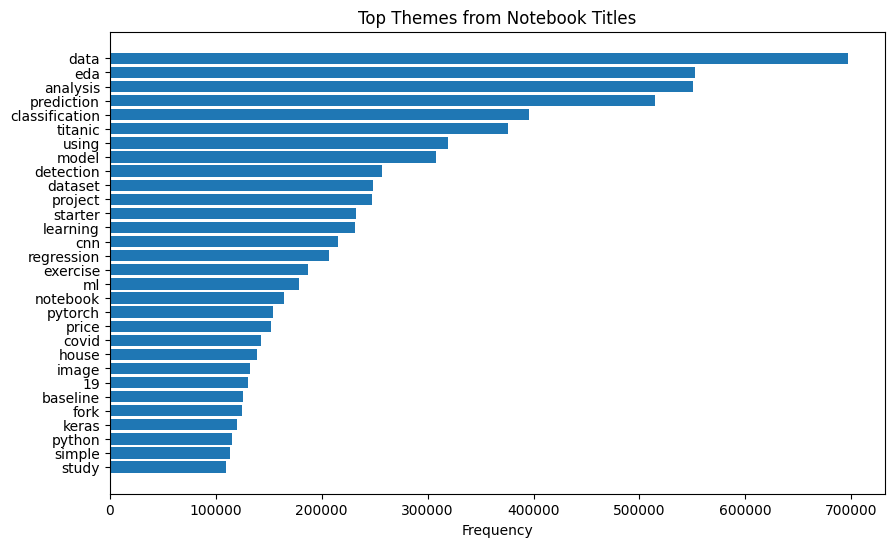

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(keyword_freq['Keyword'], keyword_freq['Frequency'])
plt.xlabel('Frequency')
plt.title('Top Themes from Notebook Titles')
plt.gca().invert_yaxis()
plt.show()


In [13]:
def assign_theme(title):
    title = title.lower()
    if any(word in title for word in ['nlp', 'text', 'bert', 'gpt', 'token']):
        return 'nlp'
    elif any(word in title for word in ['image', 'vision', 'cnn', 'segmentation']):
        return 'cv'
    elif any(word in title for word in ['eda', 'exploratory', 'analysis', 'visualization']):
        return 'eda'
    elif any(word in title for word in ['forecast', 'time series', 'arima', 'prophet']):
        return 'time_series'
    elif any(word in title for word in ['regression', 'xgboost', 'random forest', 'svm']):
        return 'ml'
    elif any(word in title for word in ['neural', 'deep', 'lstm', 'rnn']):
        return 'dl'
    else:
        return 'other'

titles_df['Theme'] = titles_df['CleanTitle'].apply(assign_theme)
titles_df[['CleanTitle', 'Theme']].head()



,CleanTitle,Theme
0,drives demand bikes,other
1,trueskill kitefoil rankings race,other
2,testarooni,other
3,workers alive?,other
4,workers alive?,other


In [14]:
user_themes = titles_df.groupby(['AuthorUserId', 'Theme']).size().unstack(fill_value=0)
user_themes.head()


Theme,cv,dl,eda,ml,nlp,other,time_series
AuthorUserId,,,,,,,
368,5,8,28,50,12,2770,1
389,0,0,9,17,0,11,0
393,10,0,0,0,0,14,0
421,0,3,3,0,21,169,0
453,0,0,0,0,0,10,0


In [15]:
user_full_profile = pd.merge(user_summary, user_themes, on='AuthorUserId', how='left')
user_full_profile.fillna(0, inplace=True)
user_full_profile.head()


,AuthorUserId,TotalNotebooks,TotalViews,TotalVotes,GoldMedals,SilverMedals,BronzeMedals,cv,dl,eda,ml,nlp,other,time_series
0,2080166,56442,10231050,7437,0.0,1.0,8.0,1999.0,612.0,747.0,151.0,1928.0,137490.0,1250.0
1,20545127,5275,14525,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5276.0,0.0
2,4760409,4407,2026419,16498,0.0,10.0,213.0,295.0,249.0,726.0,502.0,259.0,17117.0,404.0
3,2648923,3702,1454130,14002,0.0,12.0,239.0,4564.0,788.0,631.0,475.0,1510.0,29244.0,713.0
4,3012786,2934,1951265,38108,22.0,118.0,831.0,423.0,79.0,158.0,32.0,272.0,12562.0,87.0


In [27]:
import pandas as pd

kernels = pd.read_csv('../data/meta-kaggle/Kernels.csv')
versions = pd.read_csv('../data/meta-kaggle/KernelVersions.csv')


In [28]:
most_voted = versions.loc[versions.groupby('AuthorUserId')['TotalVotes'].idxmax()]
most_voted = most_voted[['AuthorUserId', 'Title', 'TotalVotes']]
most_voted.columns = ['AuthorUserId', 'MostVotedNotebook', 'MostVotes']
most_voted.head()


,AuthorUserId,MostVotedNotebook,MostVotes
183192,368,Lucky names,38
9380,389,Looking at Categorical Data,0
9216,393,Full Preprocessing Tutorial afad24,0
907344,421,GoTo - PyTorch - Baseline,57
2709637,453,covid-maranhao,0


In [30]:
versions['CreationDate'] = pd.to_datetime(versions['CreationDate'])
versions['Month'] = versions['CreationDate'].dt.to_period('M')

active_month = (
    versions.groupby(['AuthorUserId', 'Month'])
    .size()
    .reset_index(name='NotebookCount')
)

most_active_month = active_month.loc[active_month.groupby('AuthorUserId')['NotebookCount'].idxmax()]
most_active_month.columns = ['AuthorUserId', 'MostActiveMonth', 'NotebookCount']
most_active_month.drop(columns='NotebookCount', inplace=True)
most_active_month.head()


,AuthorUserId,MostActiveMonth
38,368,2020-05
77,389,2017-01
80,393,2017-02
88,421,2020-03
95,453,2020-05


In [31]:
avg_length = (
    versions.groupby('AuthorUserId')['TotalLines']
    .mean()
    .reset_index(name='AvgNotebookLength')
)
avg_length.head()


,AuthorUserId,AvgNotebookLength
0,368,67.253949
1,389,144.843750
2,393,107.384615
3,421,101.608108
4,453,79.000000


In [32]:
user_insights = most_voted.merge(most_active_month, on='AuthorUserId', how='outer')
user_insights = user_insights.merge(avg_length, on='AuthorUserId', how='outer')
user_insights.head()


,AuthorUserId,MostVotedNotebook,MostVotes,MostActiveMonth,AvgNotebookLength
0,368,Lucky names,38,2020-05,67.253949
1,389,Looking at Categorical Data,0,2017-01,144.843750
2,393,Full Preprocessing Tutorial afad24,0,2017-02,107.384615
3,421,GoTo - PyTorch - Baseline,57,2020-03,101.608108
4,453,covid-maranhao,0,2020-05,79.000000


In [34]:
import pandas as pd

# Load Day 4 features
final_user_features = pd.read_csv('../data/final_user_features.csv')

# Load Day 5 insights
user_insights = pd.read_csv('../data/user_insights.csv')


In [35]:
# Merge on AuthorUserId
full_user_df = final_user_features.merge(user_insights, on='AuthorUserId', how='left')


In [36]:
# Save the final full profile dataset
full_user_df.to_csv('../data/full_user_profiles.csv', index=False)
print("✅ Saved full_user_profiles.csv successfully.")


✅ Saved full_user_profiles.csv successfully.


In [1]:
import pandas as pd

df = pd.read_csv('../data/full_user_profiles.csv')
df.head()


,AuthorUserId,TotalNotebooks,TotalViews,TotalVotes,GoldMedals,SilverMedals,BronzeMedals,cv,dl,eda,ml,nlp,other,time_series,MostVotedNotebook,MostVotes,MostActiveMonth,AvgNotebookLength
0,368,186,180454,430,0,3,14,5.0,8.0,27.0,101.0,12.0,2720.0,1.0,Lucky names,38.0,2020-05,67.253949
1,389,13,4127,0,0,0,0,0.0,0.0,3.0,0.0,0.0,34.0,0.0,Looking at Categorical Data,0.0,2017-01,144.843750
2,393,8,1922,0,0,0,0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,Full Preprocessing Tutorial afad24,0.0,2017-02,107.384615
3,421,23,27642,201,0,2,7,0.0,3.0,0.0,0.0,7.0,186.0,0.0,GoTo - PyTorch - Baseline,57.0,2020-03,101.608108
4,453,1,134,0,0,0,0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,covid-maranhao,0.0,2020-05,79.000000


In [2]:
topic_columns = ['cv', 'dl', 'eda', 'ml', 'nlp', 'other', 'time_series']


In [3]:
def recommend_topics(row, top_n=2):
    usage = row[topic_columns]
    least_used = usage.sort_values().head(top_n)
    return ', '.join(least_used.index)

df['RecommendedTopics'] = df.apply(recommend_topics, axis=1)


In [4]:
df[['AuthorUserId', 'RecommendedTopics']].head()


,AuthorUserId,RecommendedTopics
0,368,"time_series, cv"
1,389,"cv, dl"
2,393,"cv, dl"
3,421,"cv, eda"
4,453,"cv, dl"


In [5]:
df.to_csv('../data/final_user_profiles_with_recommendations.csv', index=False)
print("✅ Final user profiles with topic recommendations saved!")


✅ Final user profiles with topic recommendations saved!


In [6]:
import pandas as pd

df = pd.read_csv('../data/full_user_profiles.csv')
df.head()


,AuthorUserId,TotalNotebooks,TotalViews,TotalVotes,GoldMedals,SilverMedals,BronzeMedals,cv,dl,eda,ml,nlp,other,time_series,MostVotedNotebook,MostVotes,MostActiveMonth,AvgNotebookLength
0,368,186,180454,430,0,3,14,5.0,8.0,27.0,101.0,12.0,2720.0,1.0,Lucky names,38.0,2020-05,67.253949
1,389,13,4127,0,0,0,0,0.0,0.0,3.0,0.0,0.0,34.0,0.0,Looking at Categorical Data,0.0,2017-01,144.843750
2,393,8,1922,0,0,0,0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,Full Preprocessing Tutorial afad24,0.0,2017-02,107.384615
3,421,23,27642,201,0,2,7,0.0,3.0,0.0,0.0,7.0,186.0,0.0,GoTo - PyTorch - Baseline,57.0,2020-03,101.608108
4,453,1,134,0,0,0,0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,covid-maranhao,0.0,2020-05,79.000000


In [7]:
topic_cols = ['cv', 'dl', 'eda', 'ml', 'nlp', 'other', 'time_series']
df['TotalTopicWork'] = df[topic_cols].sum(axis=1)

for col in topic_cols:
    df[f'{col}_pct'] = df[col] / df['TotalTopicWork']


In [8]:
def assign_persona(row):
    if row['nlp_pct'] > 0.5:
        return 'NLP-heavy'
    elif row['eda_pct'] > 0.5:
        return 'EDA-specialist'
    elif row['cv_pct'] > 0.4:
        return 'CV-expert'
    elif row['TotalTopicWork'] >= 10 and row['TotalVotes'] < 5:
        return 'Quiet Researcher'
    elif row['TotalTopicWork'] < 10 and row['TotalVotes'] > 100:
        return 'Trend Setter'
    else:
        return 'Generalist'


In [9]:
df['Persona'] = df.apply(assign_persona, axis=1)


In [10]:
df.to_csv('../data/full_user_profiles_with_persona.csv', index=False)


In [2]:
import pandas as pd

# Load the CSV you already have
df = pd.read_csv('../data/full_user_profiles.csv')


In [3]:
def assign_persona(row):
    topics = ['cv_pct', 'dl_pct', 'eda_pct', 'ml_pct', 'nlp_pct', 'time_series_pct']
    max_topic = max(topics, key=lambda t: row[t])

    if row[max_topic] < 20:
        return "🧠 Generalist"
    elif max_topic == 'nlp_pct':
        return "🗣️ NLP Specialist"
    elif max_topic == 'eda_pct':
        return "📊 EDA-Focused"
    elif max_topic == 'cv_pct':
        return "👁️ CV Enthusiast"
    elif max_topic == 'ml_pct':
        return "🤖 ML Practitioner"
    elif max_topic == 'dl_pct':
        return "🧬 DL Researcher"
    elif max_topic == 'time_series_pct':
        return "📈 Time-Series Analyst"
    else:
        return "🧠 Generalist"


In [6]:
topic_cols = ['cv', 'dl', 'eda', 'ml', 'nlp', 'time_series']
df[topic_cols] = df[topic_cols].fillna(0)

# Sum of all topic counts per user
df['total_topic_sum'] = df[topic_cols].sum(axis=1)

# Calculate percentage per topic
for col in topic_cols:
    df[f'{col}_pct'] = (df[col] / df['total_topic_sum']) * 100


In [7]:
def assign_persona(row):
    topics = ['cv_pct', 'dl_pct', 'eda_pct', 'ml_pct', 'nlp_pct', 'time_series_pct']
    max_topic = max(topics, key=lambda t: row[t])

    if row[max_topic] < 20:
        return "🧠 Generalist"
    elif max_topic == 'nlp_pct':
        return "🗣️ NLP Specialist"
    elif max_topic == 'eda_pct':
        return "📊 EDA-Focused"
    elif max_topic == 'cv_pct':
        return "👁️ CV Enthusiast"
    elif max_topic == 'ml_pct':
        return "🤖 ML Practitioner"
    elif max_topic == 'dl_pct':
        return "🧬 DL Researcher"
    elif max_topic == 'time_series_pct':
        return "📈 Time-Series Analyst"
    else:
        return "🧠 Generalist"


In [8]:
df['Persona'] = df.apply(assign_persona, axis=1)


In [9]:
df.to_csv('../data/full_user_profiles_with_persona.csv', index=False)


In [3]:
import pandas as pd

df = pd.read_csv('../data/full_user_profiles_with_persona.csv')


In [4]:
def recommend_topics(row, threshold=5):
    topic_cols = ['cv', 'dl', 'eda', 'ml', 'nlp', 'time_series']
    low_topics = [topic for topic in topic_cols if row[topic] < threshold]
    return ', '.join(low_topics) if low_topics else 'None'


In [5]:
df['RecommendedTopics'] = df.apply(recommend_topics, axis=1)


In [7]:
df.to_csv('../data/full_user_profiles_with_persona.csv', index=False)


In [5]:
import pandas as pd

# Load notebook-level metadata
kernels_df = pd.read_csv('../data/meta-kaggle/Kernels.csv', low_memory=False)

# Keep only needed columns
kernels_df = kernels_df[['AuthorUserId', 'CreationDate']]

# Convert to datetime
kernels_df['CreationDate'] = pd.to_datetime(kernels_df['CreationDate'])

# Extract year-month
kernels_df['Month'] = kernels_df['CreationDate'].dt.to_period('M').astype(str)

# Count notebooks per user per month
timeline_df = kernels_df.groupby(['AuthorUserId', 'Month']).size().reset_index(name='Count')

# Save as CSV
timeline_df.to_csv('../data/user_timeline.csv', index=False)
